In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import plotly.express as px
import plotly.graph_objects as go
import os
import numpy as np
from scipy.stats import kurtosis

# INPUT SIMULATION NAME

In [2]:
sim_name = "17"
out_file_name = "Windows_with_STD"

## Get All Valid Runs From Sim Folder

In [3]:
df = pd.read_csv(f"C:\\Users\\Ricky\\Documents\\GitHub\\Thesis\\Data Generated\\Simulation\\{sim_name}.csv")
# df = pd.read_csv(f"/Users/richardeli/Downloads/USYD/Thesis/Data Generated/Simulation/{sim_name}.csv")

df = df[df['Catastrophe Point Found?'] == True]

valid_runs = df['Run Number']

## Average Every Row For All Valid Files In Window and Output One Summary File Representing Average of All Files

In [4]:
# ## USE THIS ONE NEW ITER AND GETS STANDARD DEVIATION

# directory = f"C:\\Users\\Ricky\\Documents\\GitHub\\Thesis\\Data Generated\\Window\\{sim_name}"
# output_path = "C:\\Users\\Ricky\\Documents\\GitHub\\Thesis\\Data Generated\\Windows_with_STD.csv"

# # directory = f"/Users/richardeli/Downloads/USYD/Thesis/Data Generated/Window/{sim_name}/"
# # output_path = "/Users/richardeli/Downloads/USYD/Thesis/Data Generated/Windows_with_STD.csv"

# column_names = [
#     'Window Num', 'Num Data Points in Row', 'Speculator Proportion', 'Market Price',
#     'Excess Demand', 'Kurtosis MP', 'Kurtosis ED', 'Kurtosis SP',
#     'MP Volatility Last 100 Trades', 'MP Volatility Last 10 Trades',
#     'Overall Sim Volatility', 'Pre-CUSP Market Price Difference',
#     'Last 100 Pre-CUSP Market Prices Difference'
# ]

# averaged_data = []
# std_dev_data = []

# for row_index in range(100):
#     row_values = []  

#     for run_number in valid_runs:
#         filename = f'Run {run_number}.csv'
#         file_path = os.path.join(directory, filename)

#         try:
#             run_df = pd.read_csv(file_path)

#             if 'Speculator Proportion' in run_df.columns:
#                 run_df['Speculator Proportion'] = run_df['Speculator Proportion'].str.rstrip('%').astype(float) / 100

#             if row_index < len(run_df):
#                 row_values.append(run_df.iloc[row_index].values)
#             else:
#                 row_values.append([np.nan] * len(column_names))

#         except FileNotFoundError:
#             print(f"File not found: {file_path}")
#             row_values.append([np.nan] * len(column_names))
    
#     row_average = np.nanmean(row_values, axis=0)
#     row_std_dev = np.nanstd(row_values, axis=0)  # Calculate standard deviation
    
#     averaged_data.append(row_average)
#     std_dev_data.append(row_std_dev)

# std_dev_df = pd.DataFrame(std_dev_data, columns=column_names)
# std_dev_df.columns = [f"{col} STDV" for col in std_dev_df.columns]
# std_dev_df

# averaged_df = pd.DataFrame(averaged_data, columns=column_names)
# averaged_df

# combined_df = pd.DataFrame()
# for avg_col, std_col in zip(averaged_df.columns, std_dev_df.columns):
#     combined_df[avg_col] = averaged_df[avg_col]
#     combined_df[std_col] = std_dev_df[std_col]

# combined_df.to_csv(output_path, index=False)

# Load Data

In [5]:
df = pd.read_csv(f"C:\\Users\\Ricky\\Documents\\GitHub\\Thesis\\Data Generated\\{out_file_name}.csv")
# df = pd.read_csv(f"/Users/richardeli/Downloads/USYD/Thesis/Data Generated/{out_file_name}.csv")
df['Window Num'] = df['Window Num'] + 1
df['Speculator Proportion'] = df['Speculator Proportion'] * 100
df

columns_of_interest = [
    'Speculator Proportion', 'Market Price', 'Excess Demand', 'Kurtosis MP', 
    'Kurtosis ED', 'Kurtosis SP', 'MP Volatility Last 100 Trades', 
    'MP Volatility Last 10 Trades', 'Overall Sim Volatility', 
    'Pre-CUSP Market Price Difference', 'Last 100 Pre-CUSP Market Prices Difference'
]

# 1. Understanding the Data

## 1.1 Data Table

## FIGURE 39 1.3 Correlation Matrix

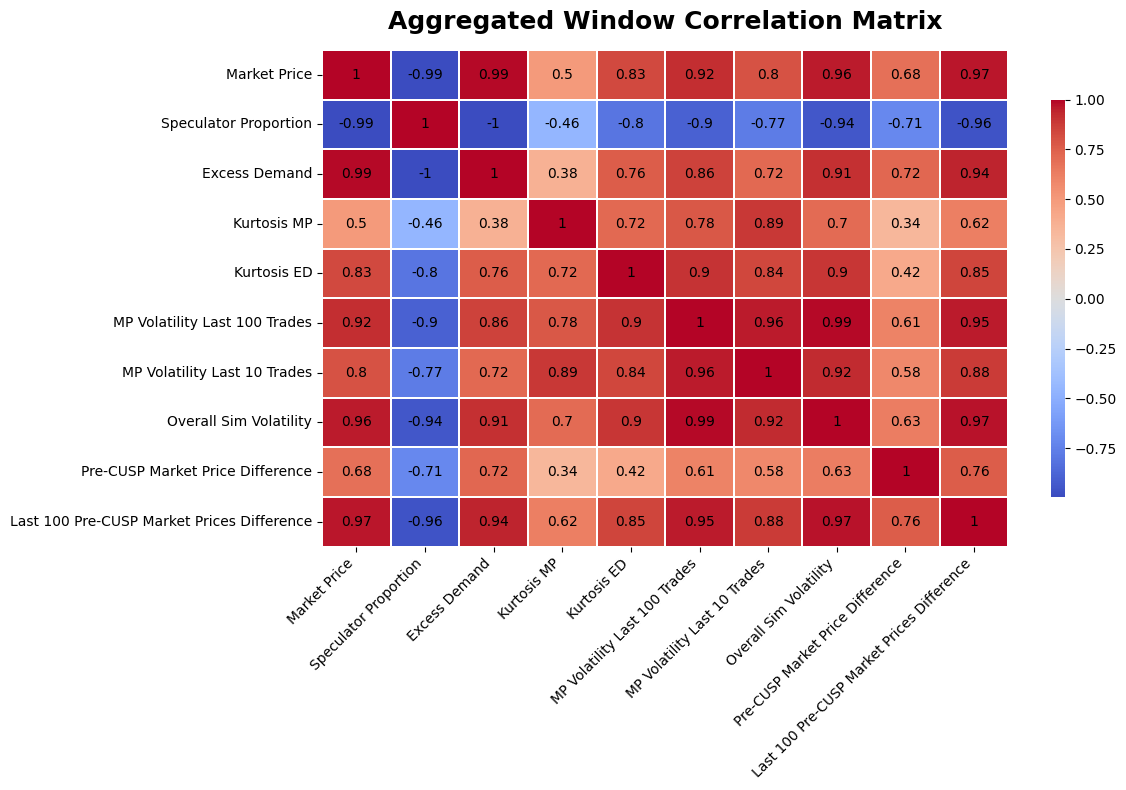

In [6]:
df_2 = df.copy()
corr_cols = [
    'Market Price', 'Speculator Proportion', 'Excess Demand', 'Kurtosis MP', 
    'Kurtosis ED', 'MP Volatility Last 100 Trades', 
    'MP Volatility Last 10 Trades', 'Overall Sim Volatility', 
    'Pre-CUSP Market Price Difference', 'Last 100 Pre-CUSP Market Prices Difference'
]

df_2 = df_2[corr_cols]
corr_matrix = df_2.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    cmap='coolwarm',  
    center=0, 
    linewidths=0.3, 
    cbar_kws={"shrink": 0.8, "aspect": 30},  
    annot_kws={"size": 10, "color": "black"},  
)

plt.title('Aggregated Window Correlation Matrix', fontsize=18, weight='bold', pad=15)
plt.xticks(rotation=45, ha='right') 
plt.yticks(rotation=0) 
plt.tight_layout()
plt.show()


# 2. Speculator Proportion Analysis Time

## FIGURE 40 - 2.1 Market Price

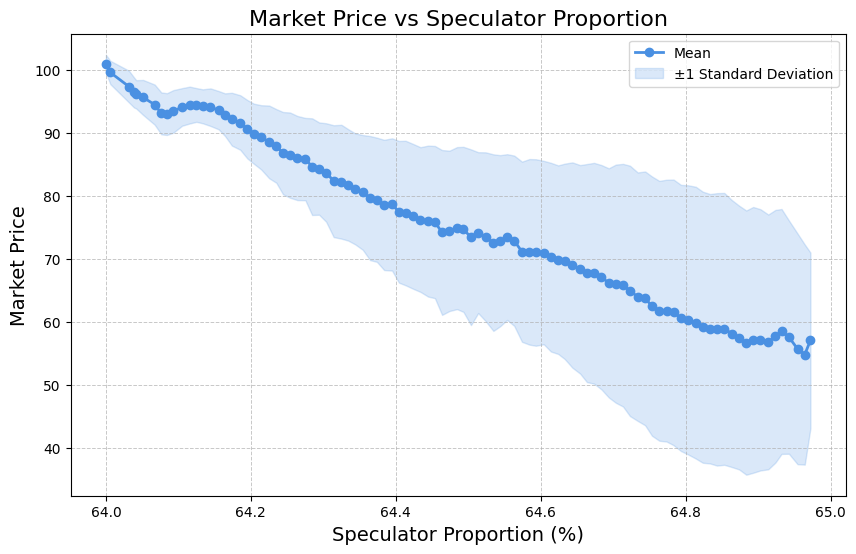

In [13]:
df_5 = df.copy()

grouped_df_1 = df_5.groupby('Speculator Proportion').agg(
    Mean_Market_Price=('Market Price', 'mean'),
    Market_Price_STDV=('Market Price STDV', 'mean')
).reset_index()

speculator_proportion = grouped_df_1['Speculator Proportion']
mean_market_price = grouped_df_1['Mean_Market_Price']
market_price_std = grouped_df_1['Market_Price_STDV']

plt.figure(figsize=(10, 6))
plt.plot(speculator_proportion, mean_market_price, 
         marker='o', color='#4A90E2', linestyle='-', linewidth=2, 
         label='Mean')
plt.fill_between(speculator_proportion,
                 mean_market_price - market_price_std,
                 mean_market_price + market_price_std,
                 color='#4A90E2', alpha=0.2, label='±1 Standard Deviation')
plt.xlabel('Speculator Proportion (%)', fontsize=14)
plt.ylabel('Market Price', fontsize=14)
plt.title('Market Price vs Speculator Proportion', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.legend()
plt.show()

## FIGURE 41: Excess Demand

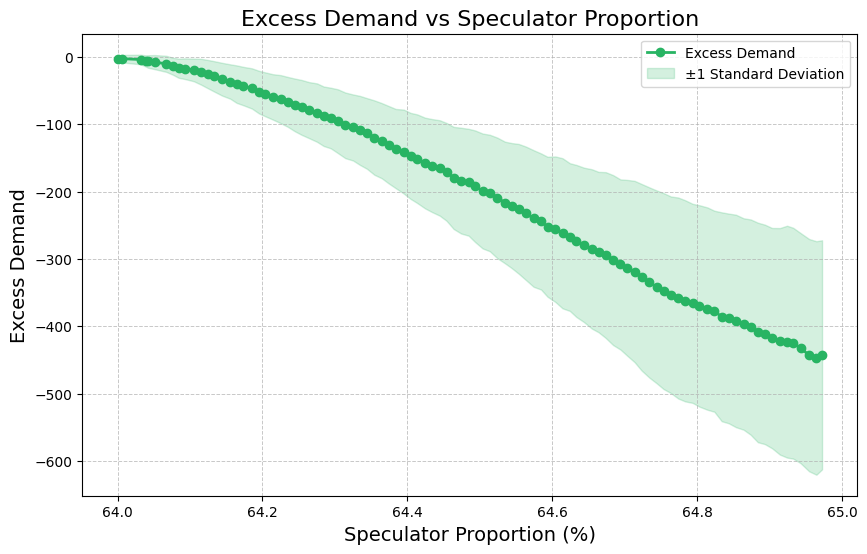

In [12]:
df_6 = df.copy()

grouped_df_excess_demand = df_6.groupby('Speculator Proportion').agg(
    Mean_Excess_Demand=('Excess Demand', 'mean'),
    Excess_Demand_STDV=('Excess Demand STDV', 'mean')  
).reset_index()

speculator_proportion = grouped_df_excess_demand['Speculator Proportion']
mean_excess_demand = grouped_df_excess_demand['Mean_Excess_Demand']
excess_demand_std = grouped_df_excess_demand['Excess_Demand_STDV']

plt.figure(figsize=(10, 6))
plt.plot(speculator_proportion, mean_excess_demand, 
         marker='o', color='#28B463', linestyle='-', linewidth=2, 
         label='Excess Demand')

plt.fill_between(speculator_proportion,
                 mean_excess_demand - excess_demand_std,
                 mean_excess_demand + excess_demand_std,
                 color='#28B463', alpha=0.2, label='±1 Standard Deviation')
plt.xlabel('Speculator Proportion (%)', fontsize=14)
plt.ylabel('Excess Demand', fontsize=14)
plt.title('Excess Demand vs Speculator Proportion', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.legend()
plt.show()

## Figure 42: Market Price Difference (Last 100 Trades, Last Trade)

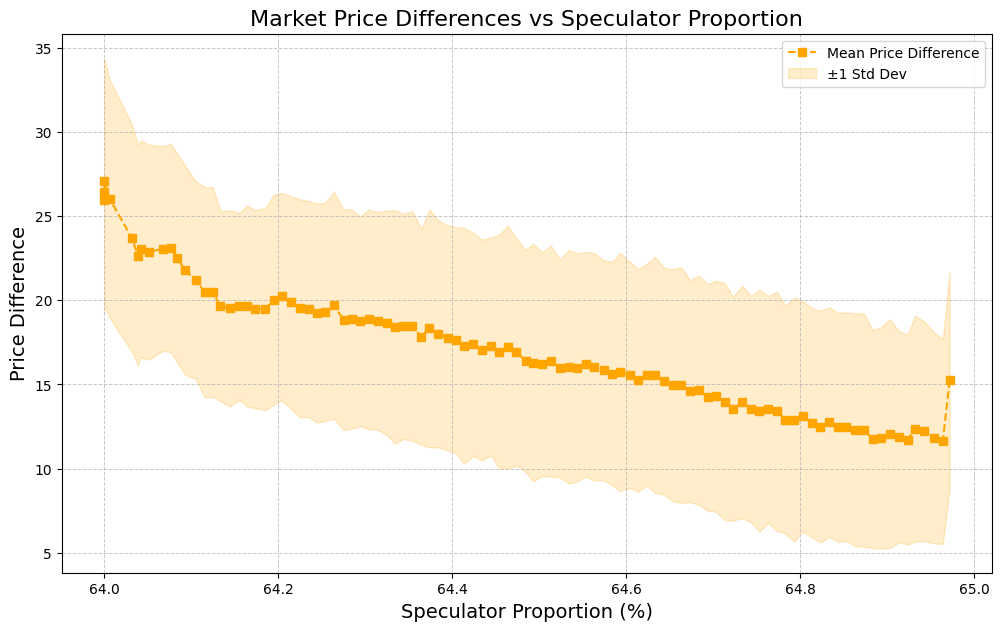

In [9]:
df_9 = df.copy()

speculator_proportion = df_9['Speculator Proportion']
mean_price_difference = df_9['Last 100 Pre-CUSP Market Prices Difference']
std_price_difference = df_9['Last 100 Pre-CUSP Market Prices Difference STDV']

plt.figure(figsize=(12, 7))
plt.plot(
    speculator_proportion, mean_price_difference, 
    marker='s', linestyle='--', color='#FFA500', label='Mean Price Difference'
)

plt.fill_between(
    speculator_proportion,
    mean_price_difference - std_price_difference,
    mean_price_difference + std_price_difference,
    color='#FFA500', alpha=0.2, label='±1 Std Dev'
)

plt.xlabel('Speculator Proportion (%)', fontsize=14)
plt.ylabel('Price Difference', fontsize=14)
plt.title('Market Price Differences vs Speculator Proportion', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.legend()
plt.show()


## Figure 42 Stats

In [10]:
speculator_proportion
mean_price_difference
upswing = 15.258051/11.609110
print(upswing)

gradient = (25.985169-11.609110)/(64.000000 - 64.971992)
print(gradient)


1.3143170320549982
-14.79030588729125


## 3.3 Bifurcation Row

In [11]:
last_row = df.iloc[-1]
last_row

Window Num                                         100.000000
Window Num STDV                                      0.000000
Num Data Points in Row                             623.781780
Num Data Points in Row STDV                         87.185555
Speculator Proportion                               64.971992
Speculator Proportion STDV                           0.001389
Market Price                                        57.086229
Market Price STDV                                   13.941437
Excess Demand                                     -442.351695
Excess Demand STDV                                 170.142348
Kurtosis MP                                         -0.347440
Kurtosis MP STDV                                     0.968430
Kurtosis ED                                         -0.447991
Kurtosis ED STDV                                     1.417386
Kurtosis SP                                          1.141975
Kurtosis SP STDV                                     9.588046
MP Volat